In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv('/content/results_with_crew.csv')
df.head(3)

,tconst,primaryTitle,startYear,rank,averageRating,numVotes,runtimeMinutes,directors,writers,genres,IMDbLink,Title_IMDb_Link
0,tt0111161,The Shawshank Redemption,1994,1,9.3,3029801,142,Frank Darabont,"Stephen King, Frank Darabont",Drama,"<a href=""https://www.imdb.com/title/tt0111161""...","<a href=""https://www.imdb.com/title/tt0111161""..."
1,tt0068646,The Godfather,1972,2,9.2,2114686,175,Francis Ford Coppola,"Mario Puzo, Francis Ford Coppola","Crime, Drama","<a href=""https://www.imdb.com/title/tt0068646""...","<a href=""https://www.imdb.com/title/tt0068646""..."
2,tt0468569,The Dark Knight,2008,3,9.0,3006220,152,Christopher Nolan,"Jonathan Nolan, Christopher Nolan, David S. Go...","Action, Crime, Drama","<a href=""https://www.imdb.com/title/tt0468569""...","<a href=""https://www.imdb.com/title/tt0468569""..."


In [6]:
df.isnull().sum()

,0
tconst,0
primaryTitle,0
startYear,0
rank,0
averageRating,0
numVotes,0
runtimeMinutes,0
directors,0
writers,26
genres,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           5000 non-null   object 
 1   primaryTitle     5000 non-null   object 
 2   startYear        5000 non-null   int64  
 3   rank             5000 non-null   int64  
 4   averageRating    5000 non-null   float64
 5   numVotes         5000 non-null   int64  
 6   runtimeMinutes   5000 non-null   int64  
 7   directors        5000 non-null   object 
 8   writers          4974 non-null   object 
 9   genres           5000 non-null   object 
 10  IMDbLink         5000 non-null   object 
 11  Title_IMDb_Link  5000 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 468.9+ KB


In [8]:
df.columns

Index(['tconst', 'primaryTitle', 'startYear', 'rank', 'averageRating',
       'numVotes', 'runtimeMinutes', 'directors', 'writers', 'genres',
       'IMDbLink', 'Title_IMDb_Link'],
      dtype='object')

# Distribution of Ratings

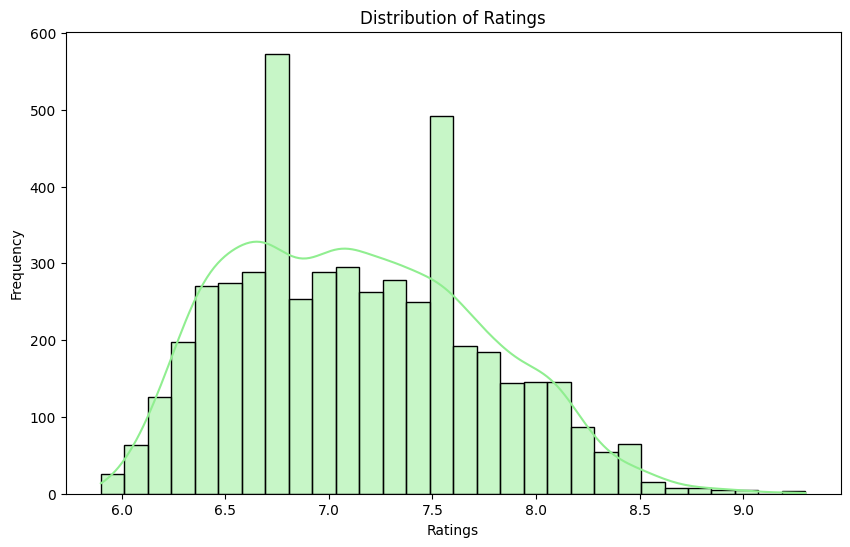

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(df['averageRating'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

We can see in the plot that the average rating most of the movies get are 6.7 - 6.8 and 7.5 - 7.6. There are very few movies with above 9.0 rating

# Movies with highest number of votes

<ipython-input-28-d666a68178cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='primaryTitle', y='numVotes', data=top_movies, palette='ch:start=.2,rot=-.3')


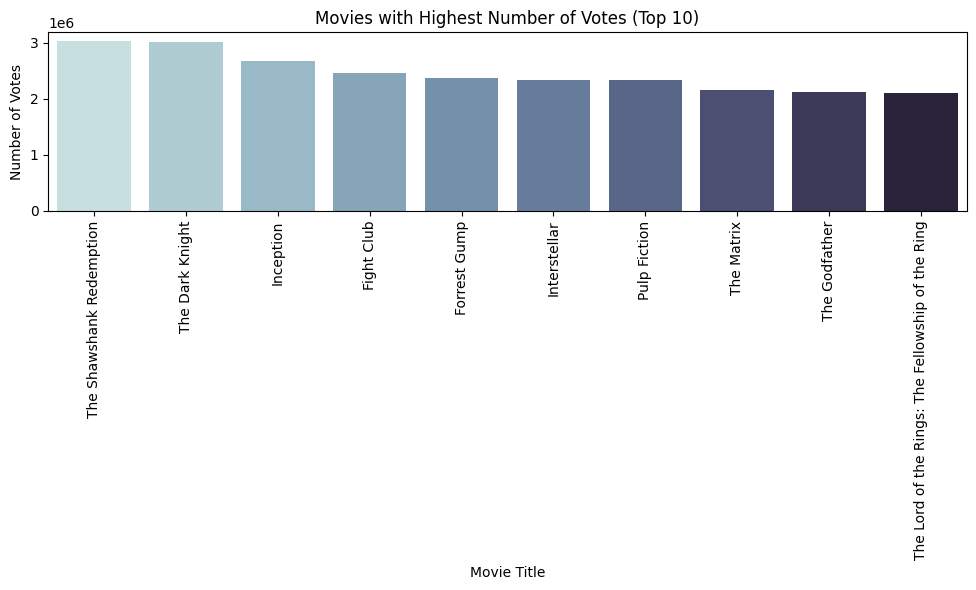

In [28]:
plt.figure(figsize=(10, 6))
top_movies = df.sort_values(by=['numVotes'], ascending=False).head(10)
sns.barplot(x='primaryTitle', y='numVotes', data=top_movies, palette='ch:start=.2,rot=-.3')
plt.title('Movies with Highest Number of Votes (Top 10)')
plt.xlabel('Movie Title')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Top 10 Genres

<ipython-input-18-008e0b9dc17f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='count', data=top_10_genres, palette='flare')


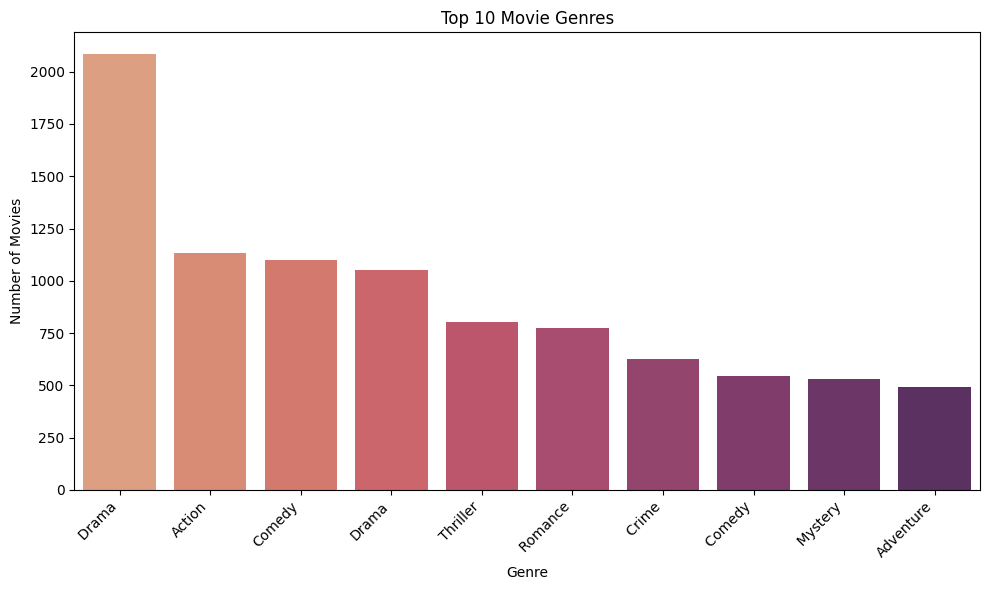

In [18]:
all_genres = df['genres'].str.split(',').explode()
genre_counts = all_genres.value_counts().reset_index()
genre_counts.columns = ['genre', 'count']
top_10_genres = genre_counts.sort_values(by=['count'], ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='count', data=top_10_genres, palette='flare')
plt.title('Top 10 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the plot we can understand that most of the movies are based on Drama, then Action, Comedy etc respectively. There are very few movies with the genre of Mystery and Adventure.

# Top 10 Directors with Most movies

<ipython-input-26-871334677f30>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='director', y='count', data=top_10_directors, palette='viridis')


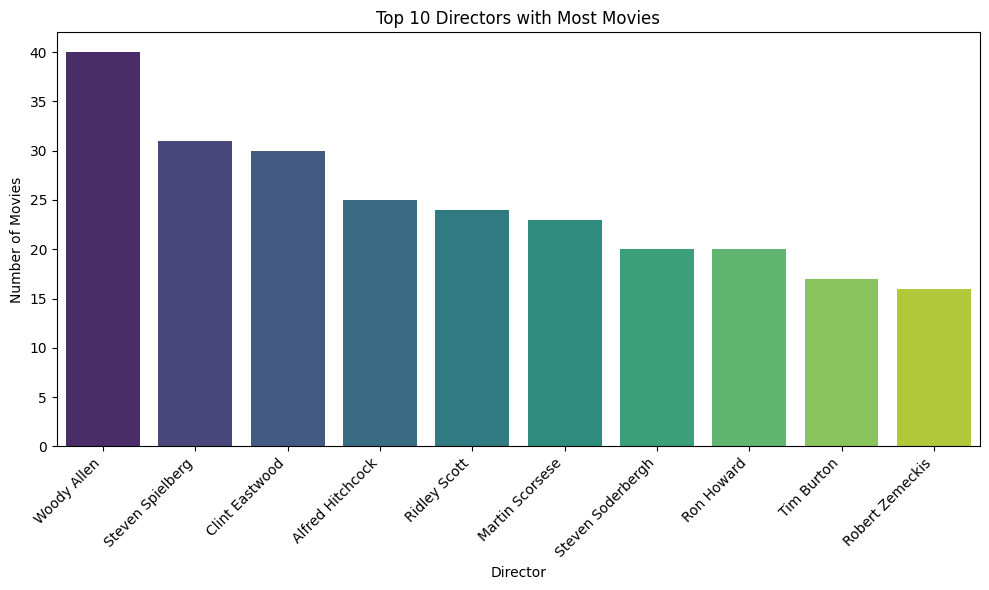

In [26]:
directors = df['directors'].str.split(',').explode()
director_counts = directors.value_counts().reset_index()
director_counts.columns = ['director', 'count']
top_10_directors = director_counts.sort_values(by=['count'], ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='director', y='count', data=top_10_directors, palette='viridis')
plt.title('Top 10 Directors with Most Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We can tell from the barplot that maximum number of movies are directed by Woody Allen, Then Steven Spielberg, Clint Eastwood respectively. Robert Zemeckis had directed least number of movies.

# Movies Length(runtime) Distribution

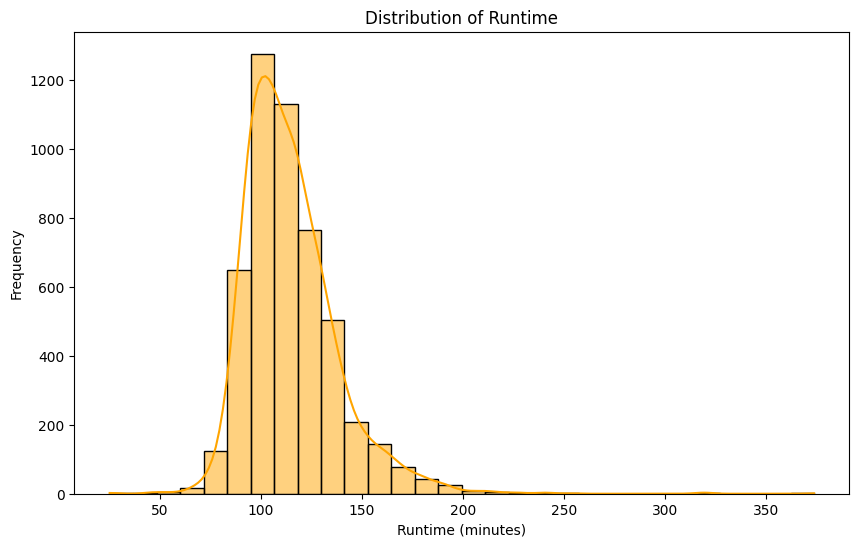

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df['runtimeMinutes'], bins=30, kde=True, color='orange')
plt.title('Distribution of Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()


Most of the movies have the average length of 100 minutes. There are very few movies with less than 50 minutes and above 250 minutes of length.

# Droping the missing rows

In [33]:
df.dropna(subset=['writers'], inplace=True)

In [34]:
df.isnull().sum()

,0
tconst,0
primaryTitle,0
startYear,0
rank,0
averageRating,0
numVotes,0
runtimeMinutes,0
directors,0
writers,0
genres,0


# Top 10 writers with most movies

<ipython-input-37-5923c39c7497>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='writers', y='count', data=top_10_writers, palette='YlOrBr')


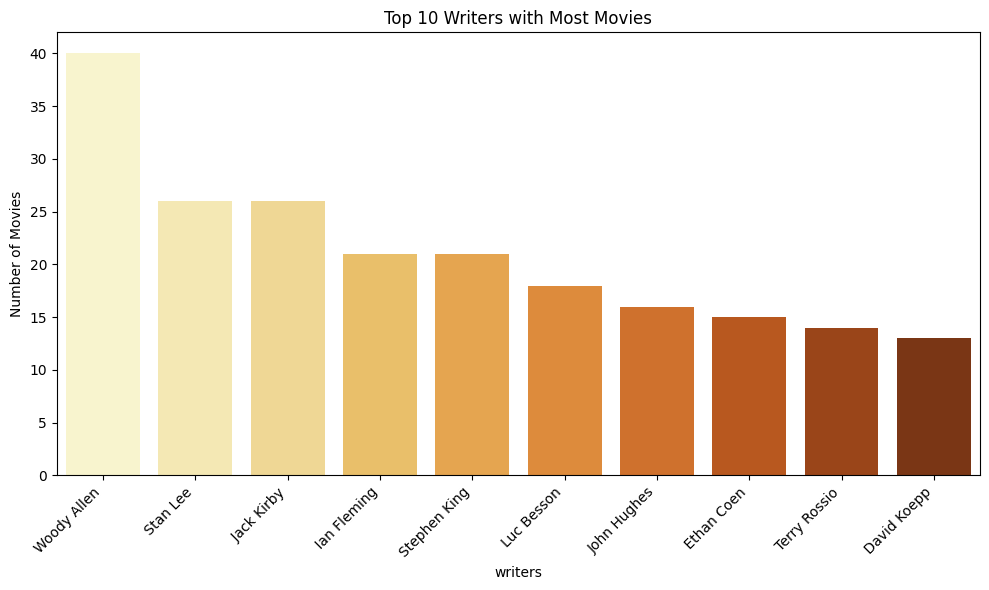

In [37]:
writers = df['writers'].str.split(',').explode()
writers_counts = writers.value_counts().reset_index()
writers_counts.columns = ['writers', 'count']
top_10_writers = writers_counts.sort_values(by=['count'], ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='writers', y='count', data=top_10_writers, palette='YlOrBr')
plt.title('Top 10 Writers with Most Movies')
plt.xlabel('writers')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This barplot shows that Woody Allen has written maximum number of movies, then Stan Lee and Jack Kirby respectively. Terry Rossio and David Koepp have written less than 20 movies.